# Assignment 2 - Logistic Regression & Naive Bayes

Due by 11:59pm, Feb 24, 2023

## Theory Questions (Full points: 40, each question 4 points)

1. Explain the importance of setting up learning rate in the gradient descent based methods. 

**Answer:**

2. What is the stochastic gradient descent? Why do we need stochastic gradient descent?

**Answer:**

3. Explain the reasons to perform feature scaling.

**Answer:**

4. What is the probabilistic generative model?

**Answer:**

5. Explain how we perform maximum likelihood.

**Answer:**

6. Explain the reasons about using cross entropy loss in logistic regression.

**Answer:**

7. Explain the differences between discriminative and generative model.


**Answer:**

8. What is N-folds? Explain the reasons why we need N-folds. 

**Answer:**

9. Bishop's Book "Pattern Recognition and Machine learning" - Exercise 4.12

**Answer:**

10. Bishop's Book "Pattern Recognition and Machine learning" - Exercise 4.13

**Answer:**

## Programming Questions (Full points: 60, each question 30 points)

In [1]:
# Do not edit the codes in this cell
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
# load dataset
x, y = load_wine(return_X_y=True)

### - Logistic Regression

0. train_test_split (Done in the below cell)

We **randomly** split data into train and test set. The number of training data and testing data is 100 and 30, respectively. Do not modify the split data. You need to use training data to train your model and obtain an optimal solution. Finally, using your model with the optimal solution to predict the testing data. 

In [2]:
# Do not edit the codes in this cell
# We split train and test data for logistic regression function

test_lists = [0, 4, 5, 7, 13, 15, 19, 27, 28, 30, 31, 34, 39, 47, 63, 74, 78, 83, 90, 92, 95, 97, 103, 113, 119, 122, 123, 125, 126, 127]

x = x[:130, :]
y = y[:130]

# training data: you can use it to training your model.
train_x = np.array([sub_x for index, sub_x in enumerate(x) if index not in test_lists])
train_y = np.array([sub_y for index, sub_y in enumerate(y) if index not in test_lists])

# testing data: ONLY use it to measure your model, do NOT use during training.
test_x = np.array([sub_x for index, sub_x in enumerate(x) if index in test_lists])
test_y = np.array([sub_y for index, sub_y in enumerate(y) if index in test_lists])

In the assignment 2, you have more freedom on your programming design. In this part, you are going to implement your own Logistic Regression function. You need to implement logistic regression with stochastic gradient descent from scratch. The required functions are listed below. You can add more functions as you need. **No library versions of logistic regression are allowed**. 
_________

1. train_val_split

**Randomly** split training data into train and val set. 80% of the training data will be the train set and 20% of the training data will be the val set.

2. normalization (data preprocessing)

You should normalize all data for each attribute firstly. 

3. sigmoid

The core of logistic regression

4. predict

Predict an output value for a given x with a set of coefficients. 

5. accurate

Calculate accuracy percentage of the predictions.

6. coef_gd

Estimate logistic regression coefficients using **vanilla gradient descent**. Using **the cross entropy loss**. Carefully choose learning rate and epochs values.

7. draw_model

a) Plot the both training loss and validation loss for each epochs.

b) Plot the both training accuracy and validation accuracy for each epochs. 

8. predict the testing data

Use your pre-trained model to predict the testing data. Print out your **testing accurate**. Is it good? If not, analyze the reason in short and modify your code to improve.  


In [ ]:
#
def draw_data(x,y):
    plt.scatter(x[:50,0],x[:50,1],marker='x',c='b',label ='0')
    plt.scatter(x[50:,0],x[50:,1],marker='o',c='g',label ='1')
    plt.title("Scatter Plot of data")
    plt.xlabel("x Value")
    plt.ylabel("y Value")
    plt.legend(loc='best')
    plt.show()

def sigmoid(n):
    sig = 1 / (1 + np.exp(-n))
    return sig
def cost(theta, x, y):
    k = len(x)
    sig = sigmoid(np.dot(x,theta))
    class1 = -y*np.log(sig)
    class2 = (1-y)*np.log(1-sig)
    cost = (class1 - class2)
    cost_cal = cost.sum()/k
    return cost_cal
def gradient(theta, x, y):
    learning_rate = 0.01
    n = len(x)
    yhat = sigmoid(np.dot(x,theta))
    gradient = np.dot(x.T,  yhat - y)
    gradient /= n
    gradient *= learning_rate
    theta -= gradient
    return theta
def predict(theta, x):
    sig2 = sigmoid(np.dot(x,theta))
    for i in range(len(sig2)):
        if sig2[i] >= 0.5:
            sig2[i] = 1
        else:
            sig2[i] = 0
    return sig2
def accurate(predictions, y):
    differnce = predictions - y
    accuScore = 1.0 - (float(np.count_nonzero(differnce)) / len(differnce))
    return accuScore
def decision_boundary(x,y,theta):
    plt.scatter(x[:50,0],x[:50,1],marker='x',c='b',label ='0')
    plt.scatter(x[50:,0],x[50:,1],marker='o',c='g',label ='1')
    X = np.arange(0,9,1)
    Y = -(theta[0]*X) / theta[1]
    plt.plot(X,Y,'-g',label="Decision Boundary")
    plt.title("Decision boundary")
    plt.xlabel("X Values")
    plt.ylabel("Y Values")
    plt.xlim(0,8)
    plt.ylim(0,5)
    plt.legend(loc='best')
    plt.show()

# initialize weight
theta = np.zeros(x_lr.shape[1])
draw_data(x_lr,y_lr)
epochs = 2000
for i in range(epochs):
  cost_fun = cost(theta, x_lr, y_lr)
  theta = gradient(theta, x_lr, y_lr)
print("The Final Cost is:",cost_fun)
predictions = predict(theta,x_lr)
score = accurate(predictions,y_lr)
print("The Accuracy Score is:",score)
decision_boundary(x_lr,y_lr,theta)

### - Naive Bayes Classifier

In this part, you are going to implement your own naive bayes classifier. 
You need to implement naive bayes classifier from scratch **using the training data of wine datasets train_x and train_y**. The required functions are listed below. You can add more functions as you need. **No library versions of naive bayes classifier are allowed**. 
_________

1. train_val_split

**Randomly** split training data into train and val set. 80% of the training data will be the train set and 20% of the training data will be the val set.

2. normalization (data preprocessing)

You should normalize all data for each attribute firstly. 

3. cross_validation_split

**Randomly** split data into 5 folds.


4. predict

Predict the class label for a given x. 

5. accurate

Calculate accuracy percentage of the predictions. Remember to average the results of k folds

6. gaussian_probability

Calculate the Gaussian probability distribution function for the given x. 

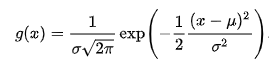


5. class_probability

Calculate the probabilities of predicting each class for a given x using naive bayes algorithm. Be aware that we have multiple input variables. And you may want to use gaussian_probability function here.

*Print out your accuracy result. Is it good? If not, analyze the reason in short. *
